# **Running a YOLOv4 Object Detector with Darknet.**

## 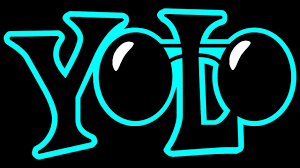

# **FOLLOW THESE 12 STEPS TO TRAIN AN OBJECT DETECTOR USING YOLOv4**

<ins>**NOTE**</ins>: If you get disconnected or lose your session for some reason you have to run steps 2, 5, and 6 again to mount the drive, edit makefile and build darknet every single time, otherwise the darknet executable will not work.

# **Note:** Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your YOLOv4 system will be able to process detections over 100 times faster than CPU.

## **Step 1:** Create **'yolo-v4'** and **'trainig'** folders in your drive

 Create a folder named ***yolov4*** in your drive. 
 
 Next, create another folder named ***training*** inside the ***yolov4*** folder. This is where we will save our trained weights (This path is mentioned in the ***obj.data*** file which we will upload later) 


## **Note:** Here I have use goggle drive to save my trained weights and all work. If you want to use my dataset and weights then only do the following steps otherwise skip to Step 3.

## **Step 2:** Mount drive, link your folder and navigate to respective folder


In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
# To list contents
!ls /mydrive

In [ ]:
#Navigate to /mydrive/yolov4
%cd /mydrive/yolov4

/content/gdrive/My Drive/yolov4


## **Step 3:** Clone [Darknet](https://github.com/AlexeyAB/darknet) git repository

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
!ls

darknet  obj.data  obj.names  obj.zip  process.py  training  yolov4-custom.cfg


## **Step 4:** Create & upload the following files which we need for training a custom detector


a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data file`

d.   `obj.names file` 

d.   `process.py file` 

**I have uploaded my custom files on [GitHub](https://github.com/MathurUtkarsh/Object-Detection-using-Yolo-v4).
I am working with 2 classes i.e. with_mask and without_mask**




## **Step 4:(a)** Upload the Labeled custom dataset obj.zip file to the yolov4 folder on your drive


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov4*** folder on your drive.



## **Step 4:(b)** Create your custom *config* file and upload it to your drive

Download the **yolov4-custom.cfg** file from ***darknet/cfg*** directory, make changes to it, and upload it to the ***yolov4*** folder on your drive .



**You need to make the following changes in your custom config file:**

*   change line batch to batch=64
*   change line subdivisions to subdivisions=16
*   change line max_batches to (classes*2000 but not less than number of training images and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
*    change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
*    set network size width=416 height=416 or any value multiple of 32
*    change line classes=80 to your number of objects in each of 3 [yolo]-layers
*    change [filters=255] to filters=(classes + 5)x3 in the 3 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers.
     So if classes=1 then it should be filters=18. If classes=2 then write filters=21.



## **Step 4:(c)** Create your *obj.data* and *obj.names* files and upload to your drive



## **Step 4:(d)** Upload the *process.py* script file to the *yolov4* folder on your drive

**To divide all image files into 2 parts. 90% for train and 10% for test.**

This *process.py* script creates the files *train.txt* & *test.txt* where the *train.txt* file has paths to 90% of the images and *test.txt* has paths to 10% of the images.


## **Step 5:** Make changes in the makefile to enable OPENCV and GPU

In [ ]:

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4/darknet


## **Step 6:** Run make command to build darknet

In [ ]:
# build darknet
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## **Step 7:** Copy all the files from the `yolov4` folder to the darknet directory

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/gdrive/MyDrive/yolov4/darknet/data
/content/gdrive/MyDrive/yolov4/darknet


In [ ]:
# Unzip the obj.zip dataset and its contents so that they are now in /darknet/data/ folder 
!unzip /mydrive/yolov4/obj.zip -d data/

Archive:  /mydrive/yolov4/obj.zip
replace data/obj/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
## Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder 
!cp /mydrive/yolov4/yolov4-custom.cfg cfg

!ls cfg/

yolov4-custom.cfg


In [ ]:
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder 
!cp /mydrive/yolov4/obj.names data
!cp /mydrive/yolov4/obj.data  data

!ls data/

labels	obj  obj.data  obj.names


In [ ]:
# Copy the process.py file to the current darknet directory 
!cp /mydrive/yolov4/process.py .

## **Step 8:** Run the *process.py* python script to create the `train.txt` & `test.txt` files inside the data folder

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

/content/gdrive/My Drive/yolov4/darknet


In [ ]:
!ls data/

labels	obj  obj.data  obj.names  test.txt  train.txt


## **Step 9:** Download the pre-trained yolo-v4 weights

In [ ]:
# Download the yolov4 pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

## **Step 10:** Training

## **Train your custom detector** 

For best results, you should stop the training when the average loss is less than 0.05 if possible or at least below 0.3, else train the model until the average loss does not show any significant change for a while.

In [ ]:
# train your custom detector!
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

### **Note:** If you get disconnected or lose your session for some reason you have to run steps 2, 5, and 6 again to mount the drive, edit makefile and build darknet every single time, otherwise the darknet executable will not work.

## To restart your training (In case the training does not finish and you get disconnected)

If you get disconnected or lose your session, you don't have to start training your model from scratch again. You can restart training from where you left off. Use the weights that were saved last. The weights are saved every 100 iterations as ***yolov4-custom_last.weights*** in the ***yolov4/training*** folder on your drive. (The path we gave as backup in "obj.data" file).


### So to restart training run only Steps 2, 5, 6 and then run the following command

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights -dont_show -map


## **Note:** Here I had shown training using best weights created only *(obtained after performing too many times training)* but you all should train it with custom weight following above steps. After performing that you can use my [best weights](https://drive.google.com/file/d/17FSFn2eXm9JaCcJKHjQBiY-DpW_ge0fE/view?usp=sharing) to best fit your model.

In [ ]:
#train your model using best weights to find the best result.
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -dont_show -map

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn 

## **Step 11:** Check performance


In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


**Check the training chart**

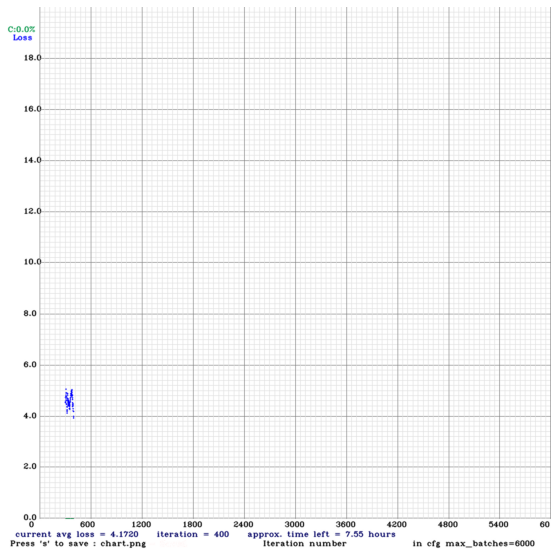

In [ ]:
#only works if the training does not get interrupted
imShow('chart.png')

## **Step 12:** Test your custom Object Detector

## Make changes to your custom config file
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

You can do it either manually or by simply running the code below

In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/MyDrive/yolov4/darknet/cfg
/content/gdrive/MyDrive/yolov4/darknet


## **Run detector on an image**

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test)
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/mask_test_images/image1.jpg -thresh 0.3


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

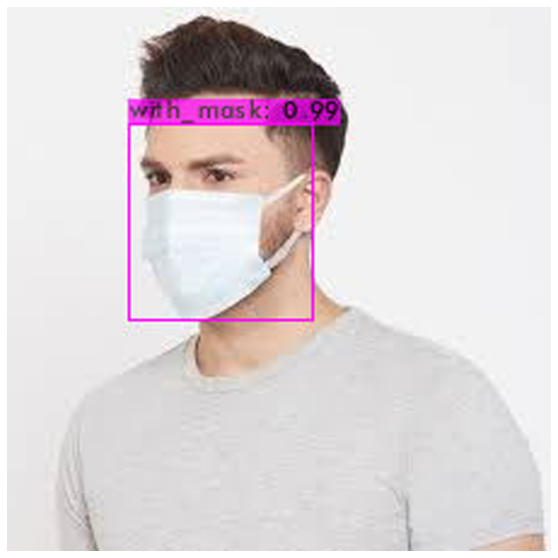

In [ ]:
imShow('predictions.jpg')

## **Run detector on a webcam image**

In [ ]:
#run detector on images captured by webcam for your custom YOLOv4 trained model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights photo.jpg -thresh 0.5
imShow('predictions.jpg')   

# **Note:** 
Here, we have learn how to train and run a `Yolo-v4` Object Detector. Now if you don't want to do all this hardwork then you can simply acces [Yolo-v4](https://drive.google.com/drive/folders/15QuGcT9GwEv4e1nli7H_OGlHQfS0DgWc?usp=sharing) folder from my google drive. There you will find all files and weights used here along with **darkent and pretrained-model.** My best weight and final weight is also uploaded there. 

You can access all these files and weights on my [github](https://github.com/MathurUtkarsh/Face_Mask_Detection_Using_Yolov4) also. 